In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.5MB/s 
     |████████████████████████████████| 194kB 30.5MB/s 
     |████████████████████████████████| 1.2MB 29.1MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '463e8387a34147aa8ee48f4ca7a206ff')

In [4]:
search_images_bing

<function fastbook.search_images_bing>

In [5]:
results = search_images_bing(key, 'jaguar')
ims = results.attrgot('content_url')
len(ims)

150

In [8]:
ims = ['https://desertmuseum.files.wordpress.com/2017/03/jaguar.jpg']

In [25]:
dest = 'images/jaguar.jpg'
download_url(ims[0], dest)

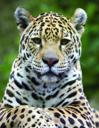

In [26]:
im = Image.open(dest)
im = im.convert('RGB')
im.to_thumb(128,128)

In [27]:
big_cat_types = 'jaguar','tiger','lion'
path = Path('panthera')

In [28]:
if not path.exists():
    path.mkdir()
    for o in big_cat_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} panthera')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [29]:
fns = get_image_files(path)
fns

(#438) [Path('panthera/jaguar/00000004.jpg'),Path('panthera/jaguar/00000001.jpg'),Path('panthera/jaguar/00000006.jpg'),Path('panthera/jaguar/00000005.jpg'),Path('panthera/jaguar/00000003.jpg'),Path('panthera/jaguar/00000007.jpg'),Path('panthera/jaguar/00000002.jpg'),Path('panthera/jaguar/00000000.jpg'),Path('panthera/jaguar/00000008.jpg'),Path('panthera/jaguar/00000011.jpg')...]

In [30]:
failed = verify_images(fns)
failed

(#0) []

In [31]:
failed.map(Path.unlink);

In [32]:
panthera = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [33]:
dls = panthera.dataloaders(path)

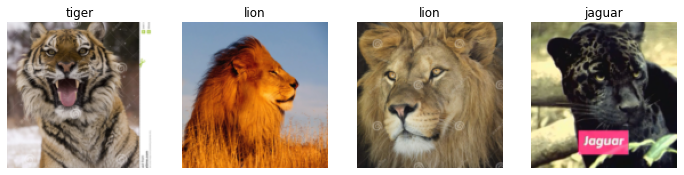

In [34]:
dls.valid.show_batch(max_n=4, nrows=1)

In [35]:
panthera = panthera.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = panthera.dataloaders(path)

In [36]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


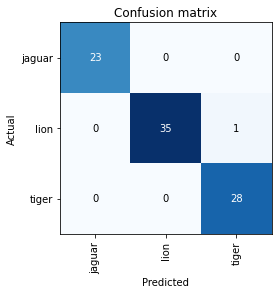

In [37]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

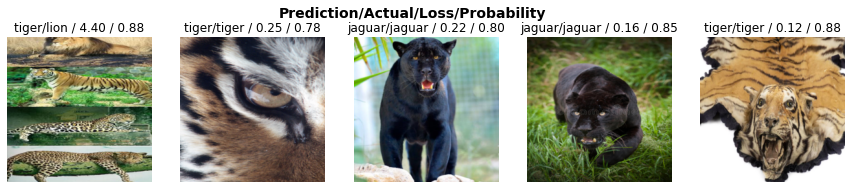

In [38]:
interp.plot_top_losses(5, nrows=1)

In [39]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [40]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [41]:
learn.export()

In [42]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [43]:
learn_inf = load_learner(path/'export.pkl')

In [44]:
learn_inf.predict('images/jaguar.jpg')

('jaguar', tensor(0), tensor([9.9998e-01, 2.8879e-07, 1.8110e-05]))

In [45]:
learn_inf.dls.vocab

['jaguar', 'lion', 'tiger']

In [46]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [47]:
btn_upload = SimpleNamespace(data = ['images/jaguar.jpg'])

In [48]:
img = PILImage.create(btn_upload.data[-1])

In [49]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [50]:
pred,pred_idx,probs = learn_inf.predict(img)

In [51]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: jaguar; Probability: 1.0000')

In [52]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [53]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [54]:
btn_upload = widgets.FileUpload()

In [55]:
VBox([widgets.Label('Select your cat!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [56]:
!pip install voila
!jupyter serverextension enable --sys-

     |████████████████████████████████| 1.9MB 5.2MB/s 
     |████████████████████████████████| 112kB 21.2MB/s 
     |████████████████████████████████| 194kB 12.1MB/s 
     |████████████████████████████████| 552kB 17.5MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 102kB 9.7MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=fe43f5be4ea00327403fde14f97ebdde4065dabe4f09b8018365516c521a092e
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
ERROR: nbdev 1.1.12 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
ERROR: jupyter-server 1.2.2 has requirement tornado>=6.1.0, but you'll have tornado 5.1.1 which is incompatible.
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Found exis

Please specify a server extension/package to enable or disable
